In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import plotly.offline as pyo 
import CoolProp.CoolProp as CP
import tensorflow as tf
from tensorflow.keras import regularizers
import plotly.io
from sklearn.utils import shuffle

dfV3 = pd.read_excel('Dimensions.xlsx', sheet_name='V3')



Vf_cs4V3 = dfV3.iloc[0,1]
Vf_cs6V3 = dfV3.iloc[0,2]
Vf_cs8V3 = dfV3.iloc[0,3]
Vf_cs10V3 = dfV3.iloc[0,4]
Vf_cs12V3 = dfV3.iloc[0,5]
Vf_cs15V3 = dfV3.iloc[0,6]
Afs_cs4V3 = dfV3.iloc[1,1]
Afs_cs6V3 = dfV3.iloc[1,2]
Afs_cs8V3 = dfV3.iloc[1,3]
Afs_cs10V3 = dfV3.iloc[1,4]
Afs_cs12V3 = dfV3.iloc[1,5]
Afs_cs15V3 = dfV3.iloc[1,6]
Acs_cs4V3 = dfV3.iloc[2,1]
Acs_cs6V3 = dfV3.iloc[2,2]
Acs_cs8V3 = dfV3.iloc[2,3]
Acs_cs10V3 = dfV3.iloc[2,4]
Acs_cs12V3 = dfV3.iloc[2,5]
Acs_cs15V3 = dfV3.iloc[2,6]
Dh_cs4V3 = dfV3.iloc[3,1]
Dh_cs6V3 = dfV3.iloc[3,2]
Dh_cs8V3 = dfV3.iloc[3,3]
Dh_cs10V3 = dfV3.iloc[3,4]
Dh_cs12V3 = dfV3.iloc[3,5]
Dh_cs15V3 = dfV3.iloc[3,6]

Lf = 120/1000

# DEFINING REYNOLDS AND VELOCITY
T = 300
mu = CP.PropsSI('V', 'T', T, 'P', 101325, 'Water')
rho = CP.PropsSI('D', 'T', 300, 'P', 101325, 'Water')




In [2]:
#FORMULAS DEF (VEL, REYNOLDS, F)

def Reynolds2(mfr, dh, acs, mu):
    Re = (mfr * dh) / (acs * mu)
    return Re 

def Velocity(mfr, rho, acs):
    Vel = (mfr) / (rho * acs)
    return Vel

def ffactor(dp, dh, L, rho, V):
    f = (dp * dh) / (2*L*rho*(np.power(V,2)))
    return f

In [3]:
#V3 DATA

# Colunas para extração de dados
col = [9, 8, 7]

# Inicialização das listas para cada CS

# Para CS4
df_cs4 = []
for freq in range(20, 55, 5):
    sheetname = f'{freq}'
    df = pd.read_excel('cs4_V3.xlsx', sheetname)
    df = df.iloc[:, col].values
    df_cs4.append(df)

mfr_cs4V3 = []
dp_cs4V3 = []
abs_cs4V3 = []

for df in df_cs4:
    massflowrate_cs4 = df[:, 0]
    differencial_cs4 = df[:, 1] * 100000
    absolute_cs4 = df[:, 2] * 100000
    lastmfr_cs4 = massflowrate_cs4[-100:]
    lastdp_cs4 = differencial_cs4[-100:]
    lastabs_cs4 = absolute_cs4[-100:]        

    mfr_cs4V3.extend(lastmfr_cs4)
    dp_cs4V3.extend(lastdp_cs4)
    abs_cs4V3.extend(lastabs_cs4)

# Para CS6
df_cs6 = []
for freq in range(20, 55, 5):
    sheetname = f'{freq}'
    df = pd.read_excel('cs6_V3.xlsx', sheetname)
    df = df.iloc[:, col].values
    df_cs6.append(df)

mfr_cs6V3 = []
dp_cs6V3 = []
abs_cs6V3 = []

for df in df_cs6:
    massflowrate_cs6 = df[:, 0]
    differencial_cs6 = df[:, 1] * 100000
    absolute_cs6 = df[:, 2] * 100000
    lastmfr_cs6 = massflowrate_cs6[-100:]
    lastdp_cs6 = differencial_cs6[-100:]
    lastabs_cs6 = absolute_cs6[-100:]        

    mfr_cs6V3.extend(lastmfr_cs6)
    dp_cs6V3.extend(lastdp_cs6)
    abs_cs6V3.extend(lastabs_cs6)

# Para CS8
df_cs8 = []
for freq in range(20, 55, 5):
    sheetname = f'{freq}'
    df = pd.read_excel('cs8_V3.xlsx', sheetname)
    df = df.iloc[:, col].values
    df_cs8.append(df)

mfr_cs8V3 = []
dp_cs8V3 = []
abs_cs8V3 = []

for df in df_cs8:
    massflowrate_cs8 = df[:, 0]
    differencial_cs8 = df[:, 1] * 100000
    absolute_cs8 = df[:, 2] * 100000
    lastmfr_cs8 = massflowrate_cs8[-100:]
    lastdp_cs8 = differencial_cs8[-100:]
    lastabs_cs8 = absolute_cs8[-100:]        

    mfr_cs8V3.extend(lastmfr_cs8)
    dp_cs8V3.extend(lastdp_cs8)
    abs_cs8V3.extend(lastabs_cs8)

# Para CS10
df_cs10 = []
for freq in range(20, 55, 5):
    sheetname = f'{freq}'
    df = pd.read_excel('cs10_V3.xlsx', sheetname)
    df = df.iloc[:, col].values
    df_cs10.append(df)

mfr_cs10V3 = []
dp_cs10V3 = []
abs_cs10V3 = []

for df in df_cs10:
    massflowrate_cs10 = df[:, 0]
    differencial_cs10 = df[:, 1] * 100000
    absolute_cs10 = df[:, 2] * 100000
    lastmfr_cs10 = massflowrate_cs10[-100:]
    lastdp_cs10 = differencial_cs10[-100:]
    lastabs_cs10 = absolute_cs10[-100:]        

    mfr_cs10V3.extend(lastmfr_cs10)
    dp_cs10V3.extend(lastdp_cs10)
    abs_cs10V3.extend(lastabs_cs10)

# Para CS12
df_cs12 = []
for freq in range(20, 55, 5):
    sheetname = f'{freq}'
    df = pd.read_excel('cs12_V3.xlsx', sheetname)
    df = df.iloc[:, col].values
    df_cs12.append(df)

mfr_cs12V3 = []
dp_cs12V3 = []
abs_cs12V3 = []

for df in df_cs12:
    massflowrate_cs12 = df[:, 0]
    differencial_cs12 = df[:, 1] * 100000
    absolute_cs12 = df[:, 2] * 100000
    lastmfr_cs12 = massflowrate_cs12[-100:]
    lastdp_cs12 = differencial_cs12[-100:]
    lastabs_cs12 = absolute_cs12[-100:]        

    mfr_cs12V3.extend(lastmfr_cs12)
    dp_cs12V3.extend(lastdp_cs12)
    abs_cs12V3.extend(lastabs_cs12)

# Para CS15
df_cs15 = []
for freq in range(20, 55, 5):
    sheetname = f'{freq}'
    df = pd.read_excel('cs15_V3.xlsx', sheetname)
    df = df.iloc[:, col].values
    df_cs15.append(df)

mfr_cs15V3 = []
dp_cs15V3 = []
abs_cs15V3 = []

for df in df_cs15:
    massflowrate_cs15 = df[:, 0]
    differencial_cs15 = df[:, 1] * 100000
    absolute_cs15 = df[:, 2] * 100000
    lastmfr_cs15 = massflowrate_cs15[-100:]
    lastdp_cs15 = differencial_cs15[-100:]
    lastabs_cs15 = absolute_cs15[-100:]        

    mfr_cs15V3.extend(lastmfr_cs15)
    dp_cs15V3.extend(lastdp_cs15)
    abs_cs15V3.extend(lastabs_cs15)

    

In [4]:
# REYNOLDS AND VELOCITY VALUES V3


mfr_cs4V3 = np.array(mfr_cs4V3)
mfr_cs6V3 = np.array(mfr_cs6V3)
mfr_cs8V3 = np.array(mfr_cs8V3)
mfr_cs10V3 = np.array(mfr_cs10V3)
mfr_cs12V3 = np.array(mfr_cs12V3)
mfr_cs15V3 = np.array(mfr_cs15V3)

V_cs4V3 = np.array(Velocity(mfr_cs4V3, rho, Acs_cs4V3))
V_cs6V3 = np.array(Velocity(mfr_cs6V3, rho, Acs_cs6V3))
V_cs8V3 = np.array(Velocity(mfr_cs8V3, rho, Acs_cs8V3))
V_cs10V3 = np.array(Velocity(mfr_cs10V3, rho, Acs_cs10V3))
V_cs12V3 = np.array(Velocity(mfr_cs12V3, rho, Acs_cs12V3))
V_cs15V3 = np.array(Velocity(mfr_cs15V3, rho, Acs_cs15V3))

Re_cs4_V3 = Reynolds2(mfr_cs4V3, Dh_cs4V3, Acs_cs4V3, mu)
Re_cs6_V3 = Reynolds2(mfr_cs6V3, Dh_cs6V3, Acs_cs6V3, mu)
Re_cs8_V3 = Reynolds2(mfr_cs8V3, Dh_cs8V3, Acs_cs8V3, mu)
Re_cs10_V3 = Reynolds2(mfr_cs10V3, Dh_cs10V3, Acs_cs10V3, mu)
Re_cs12_V3 = Reynolds2(mfr_cs12V3, Dh_cs12V3, Acs_cs12V3, mu)
Re_cs15_V3 = Reynolds2(mfr_cs15V3, Dh_cs15V3, Acs_cs15V3, mu)


f_cs4V3 = ffactor(np.array(abs_cs4V3), Dh_cs4V3, Lf, rho, V_cs4V3)
f_cs6V3 = ffactor(np.array(abs_cs6V3), Dh_cs6V3, Lf, rho, V_cs6V3)
f_cs8V3 = ffactor(np.array(abs_cs8V3), Dh_cs8V3, Lf, rho, V_cs8V3)
f_cs10V3 = ffactor(np.array(abs_cs10V3), Dh_cs10V3, Lf, rho, V_cs10V3)
f_cs12V3 = ffactor(np.array(abs_cs12V3), Dh_cs12V3, Lf, rho, V_cs12V3)
f_cs15V3 = ffactor(np.array(abs_cs15V3), Dh_cs15V3, Lf, rho, V_cs15V3)

In [5]:
#DATA REDUCTION

ANNDF = []

Re_cs4_V3 = np.array(Re_cs4_V3).flatten()
f_cs4V3 = np.array(f_cs4V3).flatten()
stpcs4 = [0.2495] * 700

Re_cs6_V3 = np.array(Re_cs6_V3).flatten()
f_cs6V3 = np.array(f_cs6V3).flatten()
stpcs6 = [0.3326] * 700

Re_cs8_V3 = np.array(Re_cs8_V3).flatten()
f_cs8V3 = np.array(f_cs8V3).flatten()
stpcs8 = [0.3745] * 700

Re_cs10_V3 = np.array(Re_cs10_V3).flatten()
f_cs10V3 = np.array(f_cs10V3).flatten()
stpcs10 = [0.3996] * 700

Re_cs12_V3 = np.array(Re_cs12_V3).flatten()
f_cs12V3 = np.array(f_cs12V3).flatten()
stpcs12 = [0.4162] * 700

Re_cs15_V3 = np.array(Re_cs15_V3).flatten()
f_cs15V3 = np.array(f_cs15V3).flatten()
stpcs15 = [0.4331] * 700


# Adicione os dados de cada conjunto no formato DataFrame
#ANNDF.append(pd.DataFrame({'Re': Re_cs4_V3, 'f': f_cs4V3, 'stp': stpcs4}))
ANNDF.append(pd.DataFrame({'Re': Re_cs6_V3, 'f': f_cs6V3, 'stp': stpcs6}))
ANNDF.append(pd.DataFrame({'Re': Re_cs8_V3, 'f': f_cs8V3, 'stp': stpcs8}))
ANNDF.append(pd.DataFrame({'Re': Re_cs10_V3, 'f': f_cs10V3, 'stp': stpcs10}))
ANNDF.append(pd.DataFrame({'Re': Re_cs12_V3, 'f': f_cs12V3, 'stp': stpcs12}))
ANNDF.append(pd.DataFrame({'Re': Re_cs15_V3, 'f': f_cs15V3, 'stp': stpcs15}))

# Combine todos os DataFrames em um único DataFrame
ANNDF = pd.concat(ANNDF, ignore_index=True)

# Exiba o DataFrame combinado
print(ANNDF.iloc[:,1])

0       1.079484
1       0.953499
2       0.701693
3       0.630074
4       0.880707
          ...   
3495    0.520451
3496    0.456780
3497    0.477337
3498    0.465900
3499    0.469986
Name: f, Length: 3500, dtype: float64


In [6]:
# DATA READ - REYNOLDS AND VELOCITY VALUES


#import data, X = inputs, Y = outputs 
ANNDF = shuffle(ANNDF)#embaralha os dados

X = ANNDF.iloc[:,[0,2]].values
Y = ANNDF.iloc[:, 1].values.reshape(-1,1)


In [7]:
#KNN Regression 

#import data, X = inputs, Y = outputs 

#normalize data
from sklearn.preprocessing import StandardScaler
scalerx = StandardScaler()
scalery = StandardScaler()
X_scaled = scalerx.fit_transform(X)
Y_scaled = scalery.fit_transform(Y)

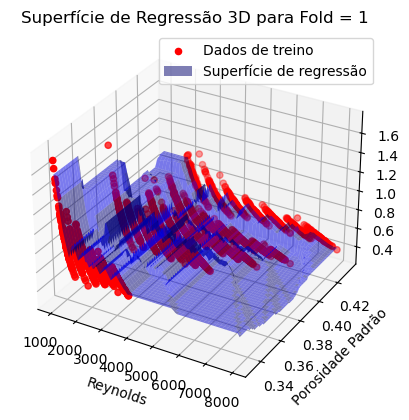

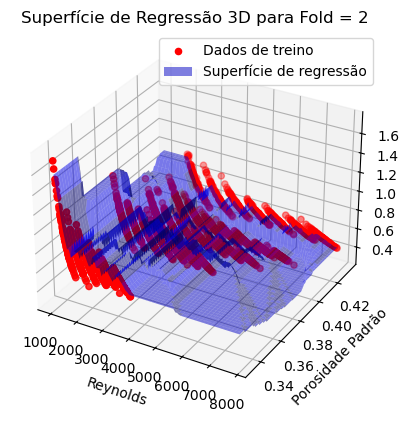

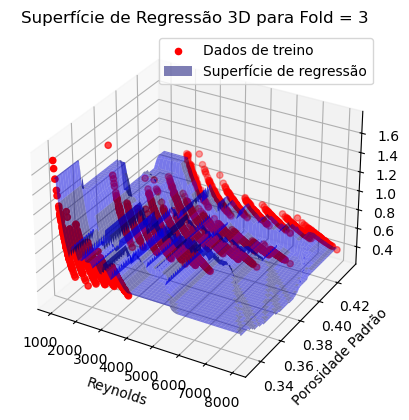

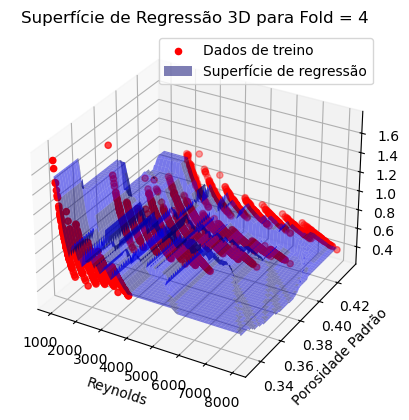

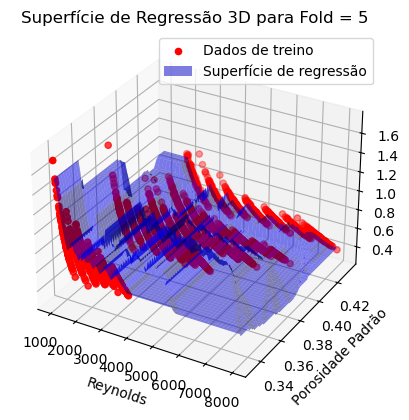

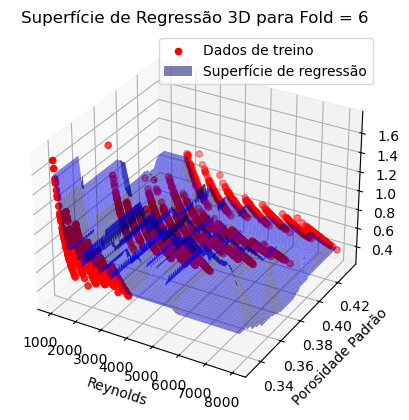

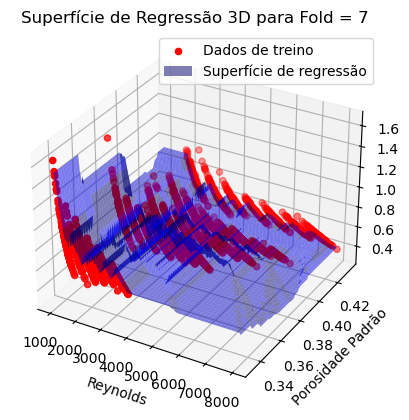

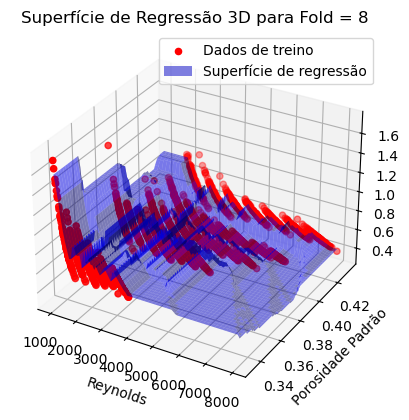

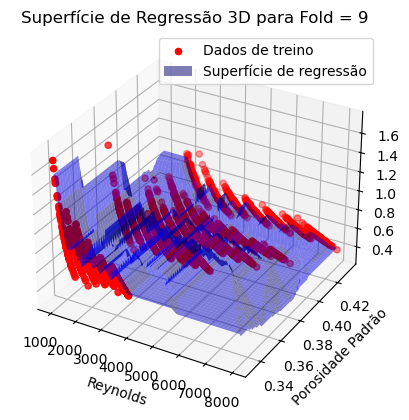

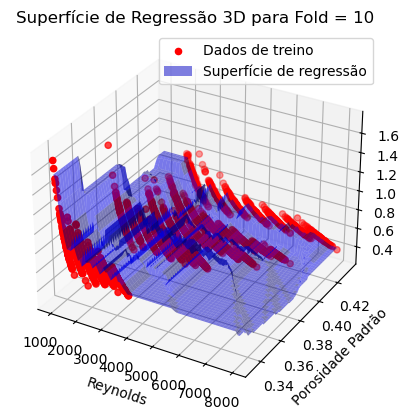

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Supondo que X_scaled e Y_scaled já estejam definidos
kf = KFold(n_splits=10)
resultados = []
fold = 0

for train, test in kf.split(X_scaled):
    fold += 1

    Xtrain = X_scaled[train]
    Ytrain = Y_scaled[train]

    Ytest = Y_scaled[test]
    Xtest = X_scaled[test]

    knn = KNeighborsRegressor(n_neighbors=5, weights='uniform', metric='minkowski', p=2)
    knn.fit(Xtrain, Ytrain)

    Xtest_original = scalerx.inverse_transform(Xtest)
    Ytest_original = scalery.inverse_transform(Ytest)
    Xtrain_original = scalerx.inverse_transform(Xtrain)
    Ytrain_original = scalery.inverse_transform(Ytrain)

    Qpred = knn.predict(Xtest)
    Qpred_inverse = scalery.inverse_transform(Qpred)

    rmse = mean_squared_error(Ytest, Qpred, squared=False)
    r2 = r2_score(Ytest, Qpred)
    resultados.append((fold, rmse, r2, Xtest_original, Qpred_inverse))

    # Criar uma grade de pontos para prever
    x_min, x_max = Xtrain_original[:, 0].min(), Xtrain_original[:, 0].max()
    y_min, y_max = Xtrain_original[:, 1].min(), Xtrain_original[:, 1].max()
    x_range = np.linspace(x_min, x_max, 100)
    y_range = np.linspace(y_min, y_max, 100)
    xx, yy = np.meshgrid(x_range, y_range)
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    # Transformar a grade para o espaço escalado
    grid_points_scaled = scalerx.transform(grid_points)

    # Prever os valores de saída para os pontos da grade
    zz_scaled = knn.predict(grid_points_scaled)
    zz = scalery.inverse_transform(zz_scaled.reshape(-1, 1))

    # Criar a superfície de regressão
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(Xtrain_original[:, 0], Xtrain_original[:, 1], Ytrain_original[:, 0], c='r', marker='o', label='Dados de treino')
    ax.plot_surface(xx, yy, zz.reshape(xx.shape), color='b', alpha=0.5, label='Superfície de regressão')

    ax.set_title(f'Superfície de Regressão 3D para Fold = {fold}')
    ax.set_xlabel('Reynolds')
    ax.set_ylabel('Porosidade Padrão')
    ax.set_zlabel('f')

    plt.legend()
    plt.savefig(f'superficie_regressao_fold_{fold}.png')
    plt.show()


In [11]:
print(Qpred_inverse)

[[0.47804629]
 [0.6551609 ]
 [0.67143269]
 [0.44729035]
 [0.72660172]
 [0.73508042]
 [0.54810529]
 [0.60709597]
 [0.71097782]
 [0.49645893]
 [0.50722961]
 [0.57632627]
 [0.71049454]
 [0.79203826]
 [0.39306431]
 [0.68276792]
 [0.50292497]
 [0.48200659]
 [0.87762114]
 [1.0200095 ]
 [0.51310222]
 [0.64055659]
 [0.42755025]
 [0.73975351]
 [0.50312931]
 [0.49217696]
 [0.67233614]
 [0.60806845]
 [0.48731291]
 [0.50238253]
 [0.60966456]
 [0.80215361]
 [1.00161215]
 [0.50585575]
 [0.34574791]
 [0.58318393]
 [0.52797481]
 [0.60837632]
 [0.67566515]
 [0.46660555]
 [0.65388297]
 [0.52773465]
 [0.65904161]
 [0.50039461]
 [0.49337763]
 [0.4495578 ]
 [1.05502236]
 [0.63371029]
 [0.50622229]
 [0.7818288 ]
 [0.6611482 ]
 [0.49875701]
 [0.49818965]
 [0.46720157]
 [0.60966456]
 [0.60966456]
 [0.47866227]
 [0.73433216]
 [0.38427563]
 [1.09758639]
 [0.73624592]
 [0.42903584]
 [0.61524166]
 [0.70300749]
 [0.4640588 ]
 [0.99783757]
 [0.64458308]
 [0.57620679]
 [0.52288044]
 [0.59088987]
 [0.63493716]
 [0.58